# Pendahuluan

Perusahaan operator telekomunikasi bernama Megaline menyediakan paket telekomunikasi dan internet prabayar. Perusahaan ini menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Lakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Data yang dimiliki yaitu 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas utama adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

# Tujuan

Dari pendahuluan yang telah dipaparkan diatas, tujuan dari analisi ini antara lain:
1. Mengetahui prilaku klien dengan paket yang berbeda.
2. Membandingkan kedua paket prabayar.
3. Menganalisis paket prabayar mana yang lebih menguntungkan. 

# Inisialisasi

Mari muat semua library yang dibutuhkan dalam analisis ini.

In [1]:
# Muat semua library
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu


## Memuat Data

Mari muat data dan simpan di beberapa tabel atau variabel berikut:
1. calls = data panggilan, file path: /datasets/megaline_calls.csv
2. internet = data internet, file path: /datasets/megaline_internet.csv
3. messages = data pesan/SMS, file path: /datasets/megaline_messages.csv
4. plans = data paket prabayar, file path: /datasets/megaline_plans.csv
5. users = data pengguna, file path: /datasets/megaline_users.csv

In [2]:
# Muat file data calls
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.sample(5)

,id,user_id,call_date,duration
36706,1139_344,1139,2018-12-07,4.50
93043,1334_411,1334,2018-11-02,13.28
43200,1157_229,1157,2018-10-26,4.49
87963,1324_4,1324,2018-11-02,6.25
95932,1340_282,1340,2018-11-04,1.79


In [3]:
# Muat file data internet
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.sample(5)

,id,user_id,session_date,mb_used
26177,1122_132,1122,2018-06-17,116.41
51582,1232_132,1232,2018-05-24,0.00
78849,1368_8,1368,2018-10-30,404.17
23168,1106_482,1106,2018-08-30,187.43
54042,1245_75,1245,2018-08-08,508.04


In [4]:
# Muat file data messages
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.sample(5)

,id,user_id,message_date
17470,1114_409,1114,2018-12-30
33662,1212_54,1212,2018-09-16
35439,1229_1336,1229,2018-12-17
5867,1054_234,1054,2018-10-12
24503,1145_358,1145,2018-07-13


In [5]:
# Muat file data plans
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
# Muat file data users
users = pd.read_csv('/datasets/megaline_users.csv')
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaN
487,1487,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",2018-08-16,ultimate,NaN
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
417,1417,Jorge,Madden,51,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-22,ultimate,NaN
293,1293,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-13,surf,NaN


## Mempersiapkan Data

Keseluruhan data sudah disimpan di dalam beberapa tabel. Mari jelajahi masing-masing tabel untuk mendapatkan pemahaman awal tentang data yang dimiliki. Lakukan koreksi di setiap tabel jika memang diperlukan untuk membantu analisis.

### Paket Prabayar

Mari mulai dengan tabel yang berisi data paket prabayar dengan menampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar dan tampilkan sampel data untuk paket-paket tersebut.


In [7]:
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Terdapat 8 kolom dan 2 baris. Tabel ini berisi nilai paket yang digunakan sebagai acuan para pengguna dalam memilih paket prabayar. Paket prabayar yang tersedia ada 2 jenis yaitu surf dan ultimate.
Dari info yang diberikan diatas, pada tabel ini tidak terdapat missing value dan tipe data nya pun sudah sesuai. Langkah selanjutnya mari pelajari apa yang bisa ditabhakan pada tabel untuk mempermudah proses analisis.


#### Memperbaiki Data dan Memperkaya Kualitas Data

Dari segi tipe data terlihat tidak terdapat masalah namun ada kolom yang mungkin harus di ganti karena satuan nya masih menggunakan megabyte. Untuk mempermudah analisis kedepannya, mari ganti kolom megabyte dengan kolom yang berisi satuan gigabyte.

Untuk catatan saja bahwa 1 gigabyte adalah 1024 megabyte, jadi untuk mendapatkan nilai gigabyte, nilai pada kolom megabyte dibagi dengan 1024. 

In [8]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [9]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Kolom gigabyte sudah berhasil ditambahkan pada tabel. Nilai yang dihasilkan sudah sesuai dengan ketentuannya. Untuk paket surf 15 GB dan untuk paket ultimate 30 GB.


### Pengguna

Mari lanjut dengan menjelajahi tabel pengguna dengan menampilkan informasi/rangkuman umum tentang DataFrame pengguna dan tampilkan sampel data pada tabel pengguna ini.


In [10]:
users.info()
users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Tabel ini berisi data dari user/pengguna yang menggunakan paket prabayar di Megaline. Terdapat id pengguna, nama pengguna kota, waktu registrasi dan paket yang dipilih. Sesuai dengan data sample yang ditampilkan, tabel ini memiliki beberapa masalah. Masalah tersebut seperti pada kolom `city`. Untuk lebih jelas, mari tampilkan kolom `city` terlebih dahulu.


#### Memperbaiki Data dan Memperkaya Kualitas Data

Terdapat beberapa masalah pada tabel ini. Sesuai dengan keterangan diatas, mari tampilkan kolom `city` untuk mengetahui lebih lanjut.

In [11]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Cape Coral-Fort Myers, FL MSA                       1
Greensboro-High Point, NC MSA                       1
El Paso, TX MSA                                     1
Jacksonville, FL MSA                                1
Name: city, Length: 73, dtype: int64

Terlihat pada data yang ditampilkan diatas, kolom ini memiliki masalah yaitu nama kota terlalu panjang dan rumit. Lalu masalah lainnya adalah terlihat bahwa setiap nama kota terdapat pola dibelakangnya dengan menggunakan singkatan MSA.  

Untuk mengatasinya, mari buat kolom baru dengan inisial dari nama kota tersebut dan untuk mengatasi pola MSA, mari hapus kata MSA pada kolom baru yang dibuat. 

In [12]:
# Membersihkan kolom `city` pada tabel users
users['inisial_city'] = users['city'].str.split(', ').str[1]
users['inisial_city'] = users['inisial_city'].str.replace(' MSA', '')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,inisial_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA


Kolom baru bernama `inisial_city` sudah berhasil ditambahkan dengan inisial dari nama kota pengguna, dan menghapus pola yang ada yaitu kata MSA.

Karena perintah yang diberikan adalah untuk membandingan kota NY-NJ dengan kota yang lain, maka perlu kolom baru untuk mempermudah analisis kedepannya. MAri buat kolom baru yang berisi berisi nilai bahwa kota tersebut adalah NY-NJ atau bukan. Untuk mempermudahnya mari buat kolom baru dengan nama `is_NY-Nj` yang berisi nilai bolean, bila true itu 1 bila false itu 0.  

In [13]:
users['is_NY-NJ'] = users['inisial_city'].str.contains('NY-NJ', regex=True)
users['is_NY-NJ'] = users['is_NY-NJ'].replace(True, 1).replace(False, 0)
users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,inisial_city,is_NY-NJ
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ-PA,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,LA,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,CA,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ-PA,1
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,FL,0


Kolom baru dengan nama `is_NY-NJ` sudah berhasil ditambahkan dengan nilai bolean. Terlihat bahwa bila kota pengguna adalah NY-NJ maka nilai yang ditampilkan pada kolom baru adalah 1. Artinya pengguna tersebut benar berasal dari NY-NJ dan untuk kota lain selain NY-NJ akan ditampilakan dengan angka 0.

### Panggilan

Tampilkan informasi/rangkuman umum tentang DataFrame panggilan  Tampilkan sampel data berisi panggilan

In [14]:
calls.info()
calls.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Dari data yang ditampilkan, tidak terdapat missing value. Ada beberapa catatan yang harus diperbaiki dalam kolom ini, diantaranya:
1. Format kolom `call_date` masih object dan harus dirubah ke format datetime.
2. Sesuai aturan yang diberikan, pada kolom `duration` bila terdapat durasi yang lebih, maka durasi tersebut harus dibulatkan keatas.
3. Karena perintah yang diberikan adalah untuk menampilkan per user per bulan, maka perlu kolom baru dengan nilai bulan dan tahun nya saja. 

#### Memperbaiki Data dan Memperkaya Kualitas Data

Langkah pertama, kolom `call_date` harus dirubah terlebih dahulu ke format datetime.

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Kolom `call_date` sudah berhasil dirubah ke format datetime. Berikutnya adalah mengatasi nilai pda kolom `duration` dengan membulatkan nya ke atas.


In [16]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.sample(5)

,id,user_id,call_date,duration
136342,1494_184,1494,2018-07-26,5
5232,1022_498,1022,2018-10-07,2
7345,1035_51,1035,2018-12-13,2
110539,1389_657,1389,2018-09-22,7
74547,1263_531,1263,2018-04-12,5


Nilai pada kolom `duration` sudah berhasil dibulatkan keatas. Langkah selanjutnya adalah mari perkaya kualitas data dengan menambahkan kolom `month` didalam tabel.

Permasalahan tipe data pada kolom `call_date` sudah berhasil diatasi, langkah selanjutnya, mari tambahkan kolom baru dengan nama kolom `call_month` yang berisi dari nilai bulan dan tahun agar mempermudah proses analisis kedepannya.

In [17]:
calls['month'] = calls['call_date'].dt.to_period('m')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


Kolom baru yang bernama `month` sudah berhasil ditambahkan. Kolom ini berisi bulan dan tahun sesuai dengan kolom `call_date`.

### Pesan/SMS

Tampilkan informasi/rangkuman umum tentang DataFrame SMS Tampilkan sampel data untuk SMS


In [18]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Pada tabel messanges terdapat permasalahan yang sama dengan tabel calls yaitu kolom `message_date` masih memiliki format object dan harus dirubah ke datetime. 

#### Memperbaiki Data dan Memperkaya Kualitas Data

Mari rubah format kolom `message_date` ke datetime.

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Kolom `message_date` sudah berhasil dirubah ke format datetime. Langkah selanjutnya pun sama dengan tabel calls, dengan menambahkan kolom baru dengan nilai bulan dan tahun untuk mempermudah analisis kedepannya.

Untuk mempermudah penggabungan tabel nya nanti, mari tambahkan kolom baru yang nama kolom nya sama dengan tabel sebelumnya yaitu `month`.

In [20]:
messages['month'] = messages['message_date'].dt.to_period('m')
messages.sample(5)

,id,user_id,message_date,month
51957,1335_548,1335,2018-12-17,2018-12
23296,1141_87,1141,2018-08-06,2018-08
28061,1173_99,1173,2018-10-01,2018-10
20879,1132_2,1132,2018-04-22,2018-04
7709,1060_45,1060,2018-10-25,2018-10


Kolom `month` yang berisi bulan dan tahun sudah berhasil ditambahkan ke dalam tabel messages.

### Internet

Tampilkan informasi/rangkuman umum tentang DataFrame internet Tampilkan sampel data untuk traffic internet


In [21]:
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
38207,1171_578,1171,2018-02-26,113.53
44963,1199_242,1199,2018-11-12,0.00
59608,1268_277,1268,2018-11-11,508.05
10679,1054_214,1054,2018-10-10,420.43
32323,1146_238,1146,2018-11-23,0.00


Pada tabel internet terdapat permasalahan yang sama dengan tabel sebelumnya yaitu kolom `session_date` masih memiliki format object dan harus dirubah ke datetime. 

#### Memperbaiki Data dan Memperkaya Kualitas Data

Mari rubah format kolom `session_date` ke datetime.

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Kolom `session_date` sudah berhasil dirubah ke format datetime. Langkah selanjutnya pun sama dengan tabel sebelumnya, dengan menambahkan kolom baru dengan nilai bulan dan tahun untuk mempermudah analisis kedepannya.

Mari buat kolom baru dengan nama yang sama pada tabel sebelumnya untuk mempermudah pengabungan tabel nya nanti. Namai kolom tersebut dengan nama `month`. 

In [23]:
internet['month'] = internet['session_date'].dt.to_period('m')
internet.sample(5)

,id,user_id,session_date,mb_used,month
61648,1280_169,1280,2018-07-30,258.05,2018-07
96888,1456_191,1456,2018-10-26,305.63,2018-10
59549,1268_218,1268,2018-09-11,50.38,2018-09
89946,1415_50,1415,2018-08-25,337.01,2018-08
16281,1073_183,1073,2018-04-19,481.97,2018-04


Kolom `month` yang berisi bulan dan tahun sudah berhasil ditambahkan ke dalam tabel internet.

### Kesimpulan

Ada beberapa kesimpulan dari bebrapa tahapan yang telah dilakukan, diantaranya:
1. Pada tabel Plans tidak terdapat masalah dari segi tipe data, pada tabel ini kolom baru dengan satuan gigabyte telah ditambahkan.
2. Pada tabel Users terdapat masalah dikolom `city`. Kolom ini memiliki nama yang terlalu panjang dan rumit, namun permasalah di kolom ini sudah berhasil diatasi dengan menambah kolom baru yang berisi inisial dari kota yang ada. Dan penambahan lain yaitu menambahkan kolom `is_NY-NJ` untuk memudahkan proses analisis kedepannya.
3. Pada tabel Calls, format kolom `call_date` dirubah ke format datetime. Untuk mempermudah analisis pada tabel ini kolom baru dengan nama `month` berhasil ditambahkan yang berisi nilai dari bulan dan tahun.
4. Pada tabel Messages, format kolom `messages_date` dirubah ke format datetime dan kolom baru dengan nama `month` berhasil ditambahkan yang berisi nilai dari bulan dan tahun.
5. Pada tabel Internet, format kolom `session_date` dirubah ke format datetime dan kolom baru dengan nama `month` berhasil ditambahkan yang berisi nilai dari bulan dan tahun.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, tampilkan lagi paket plans untuk memahami persyaratan yang ada.

In [24]:
# Menamplikan persyaratan paket prabayar 
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Terlihat dari tabel plans diatas, kolom pemakaian dengan satuan gigabyte sudah ada didalam tabel, maka dari itu kolom dengan satuan megabyte sudah tidak diperlukan. Jadi untuk tahap ini mari drop saja kolom dengan pemakaian megabyte per month.

In [25]:
plans.drop('mb_per_month_included', axis=1, inplace=True) 
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


Kolom `mb_per_moth_included` sudah berhasil di drop. Mari lanjutkan ker tahap berikutnya.

## Mengagregasi Data per Pengguna

Sekarang, karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.

Mari buat agregasi data setiap tabel agar memudahkan analisis ke depannya. Kelompokan data yang diperlukan saja sesuai perintah yang diberikan.

In [26]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


Mari hitung jumlah panggilan yang dilakukan oleh pengguna per bulannya, lalu masukan perhitungan tersebut ke kolom baru yang bernama `call_count`. 

In [27]:
# Menghitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan.
count_call = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc='count').reset_index()
count_call.columns = ['user_id', 'month', 'call_count']
count_call.head()

,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


Jumlah panggilan pengguna per bulan sudah berhasil ditambahkan, lanjut dengan menghitung jumlah durasi panggilan oleh pengguna perbulannya.

In [28]:
# Menghitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan.
call_agg = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
call_agg.head(10)

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
5,1001,2018-12,412
6,1002,2018-10,59
7,1002,2018-11,386
8,1002,2018-12,384
9,1003,2018-12,1104


Dari tabel call, didapat jumlah panggilan per pengguna per bulannya dan total durasi panggilan per pengguna per bulannya. Mari gabungkan tabel keduanya ke tabel call_agg.

In [29]:
call_agg = call_agg.merge(count_call, how='outer', on=['user_id', 'month'])
call_agg.sample(5)

,user_id,month,duration,call_count
950,1203,2018-05,587,75
627,1136,2018-12,337,50
13,1004,2018-08,354,49
1668,1365,2018-11,1099,150
201,1049,2018-10,317,47


Tabel call sudah berhasil dikelompokan per user per bulan dan tabel ini berisi jumlah panggilan per user per bulan dan juga durasi panggilan per user per bulannya.

Mari lanjut agregasi tabel yang lainnya.

In [30]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [31]:
# Menghitung jumlah SMS yang dikirim oleh setiap pengguna per bulan.
messages_agg = pd.pivot_table(messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_agg.columns = ['user_id', 'month', 'sms']
messages_agg.sample(5)

,user_id,month,sms
1276,1343,2018-10,137
519,1140,2018-09,12
896,1242,2018-12,64
328,1095,2018-04,1
615,1165,2018-11,42


Tabel messages sudah berhasil di agregasikan dengan menambahkan jumlah sms yang dilakukan oleh pengguna per bulannya.
Mari lanjutkan langkah selanjutnya ke tabel yang lain.

In [32]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [33]:
# Menghitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. 
internet_agg = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Jumlah volume internet yang dilakukan oleh pengguna sudah berhasil didapat, namun satuan nya masih dalam megabyte. Mari bagi nilai tersebut dengan 1024 mb untuk mengetahui jumlah volume internet dalam satuan gigabyte, lalu masukan ke kolom baru yang bernama `gb_used`.

In [34]:
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used'] / 1024)
internet_agg.sample(5)

,user_id,month,mb_used,gb_used
927,1193,2018-11,18789.59,19.0
101,1028,2018-09,26563.75,26.0
1546,1335,2018-12,16815.88,17.0
1825,1394,2018-09,4360.68,5.0
563,1120,2018-08,19046.98,19.0


Kolom baru yang berisi volume internet dengan satuan gigabyte yang dilakukan oleh pengguna perbulannya sudah berhasil ditambahkan.

Langkah selanjunya mari buat tabel baru yang menampung semua tabel diatas agar dapat mempermudah analisis kedepannya. Langkah pertama mari gambungkan terlebih dahulu tabel user dan plan.

In [35]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,inisial_city,is_NY-NJ
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA,0


In [36]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [37]:
# Penggabungan data users dan plans
user_plan = users.merge(plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
user_plan.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA,0,50,500,20,10,0.03,0.03,15.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV,0,50,500,20,10,0.03,0.03,15.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK,0,50,500,20,10,0.03,0.03,15.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA,0,50,500,20,10,0.03,0.03,15.0


Tabel baru menampung tabel users dan plans, namun ada beberapa kolom yang tidak dibutuhkan untuk analisis kedepan. Maka dari itu kolom-kolom yang tidak dibutuhkan sebaiknya di drop saja untuk mempermudah analisis kedepannya.

In [38]:
user_plan.drop(['first_name', 'last_name', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
user_plan.head()

,user_id,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
2,1002,36,surf,NV,0,50,500,20,10,0.03,0.03,15.0
3,1003,52,surf,OK,0,50,500,20,10,0.03,0.03,15.0
4,1004,40,surf,WA,0,50,500,20,10,0.03,0.03,15.0


Mari lanjut ke tahap selanjunya yaitu satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu.

In [39]:
main = call_agg.merge(internet_agg, how='outer', on=['user_id', 'month'])
main = main.merge(messages_agg, how='outer', on=['user_id', 'month'])


data = main.merge(user_plan, how='left', on='user_id')
data.sample(5)

,user_id,month,duration,call_count,mb_used,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
1543,1340,2018-08,46.0,8.0,NaN,NaN,8.0,65,surf,TX,0,50,500,20,10,0.03,0.03,15.0
1434,1320,2018-08,876.0,127.0,21542.06,22.0,68.0,23,surf,CA,0,50,500,20,10,0.03,0.03,15.0
1664,1365,2018-07,1082.0,155.0,5979.39,6.0,52.0,19,surf,MI,0,50,500,20,10,0.03,0.03,15.0
877,1187,2018-07,565.0,78.0,16703.96,17.0,8.0,49,surf,TX,0,50,500,20,10,0.03,0.03,15.0
115,1031,2018-10,563.0,74.0,18775.73,19.0,2.0,52,ultimate,NY-NJ-PA,1,1000,3000,70,7,0.01,0.01,30.0


Terlihat di tabel data, semua tabel yang terpisah tadi sudah menjadi satu di tabel data. Karena perintah yang diberikan adalah untuk mempelajari perilaku pengguna, dan dari penggunaan panggilan, sms, dan internet setiap pengguna di bulatkan ke atas dan khusus untuk internet adalah menggunakan satuan gigabyte, maka kolom `mb_used` sudah tidak diperlukan karena kolom yang diperlukan sudah ada yaitu kolom `gb_used`. Maka dari itu kolom `mb_used` sebaiknya di drop saja. 

In [40]:
data.drop(['mb_used'], axis=1, inplace=True)
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0


Data yang diperlukan sudah tersedia di tabel data. Sebelum mencari pendapatan per bulan untuk setiap user, sebaiknya perlu dicek terlebih dahulu apakah pada tabel data terdapat missing value.

In [41]:
data.isna().sum()

user_id                    0
month                      0
duration                  35
call_count                35
gb_used                   16
sms                      487
age                        0
plan                       0
inisial_city               0
is_NY-NJ                   0
messages_included          0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
gb_per_month_included      0
dtype: int64

Terdapat beberapa kolom yang memiliki missing value didalam nya. Mari pelajari lebih lanjut kolom-kolom tersebut dan amati apakah missing value tersebut dapat dirubah nilainya atau tidak.

In [42]:
data[data['duration'].isna()].head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
2258,1028,2018-02,NaN,NaN,13.0,12.0,57,ultimate,PA-NJ-DE-MD,0,1000,3000,70,7,0.01,0.01,30.0
2259,1080,2018-08,NaN,NaN,21.0,31.0,45,surf,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
2260,1080,2018-09,NaN,NaN,25.0,64.0,45,surf,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
2261,1080,2018-10,NaN,NaN,30.0,59.0,45,surf,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
2262,1080,2018-11,NaN,NaN,33.0,50.0,45,surf,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0


In [43]:
data[data['gb_used'].isna()].head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
174,1044,2018-08,13.0,1.0,NaN,NaN,74,surf,NM,0,50,500,20,10,0.03,0.03,15.0
1027,1222,2018-06,14.0,2.0,NaN,2.0,18,surf,CA,0,50,500,20,10,0.03,0.03,15.0
1543,1340,2018-08,46.0,8.0,NaN,8.0,65,surf,TX,0,50,500,20,10,0.03,0.03,15.0
1545,1340,2018-10,441.0,70.0,NaN,62.0,65,surf,TX,0,50,500,20,10,0.03,0.03,15.0
1793,1393,2018-10,71.0,9.0,NaN,4.0,44,surf,TN,0,50,500,20,10,0.03,0.03,15.0


In [44]:
data[data['sms'].isna()].head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
29,1009,2018-05,534.0,71.0,20.0,NaN,19,surf,CA,0,50,500,20,10,0.03,0.03,15.0
30,1009,2018-06,823.0,110.0,19.0,NaN,19,surf,CA,0,50,500,20,10,0.03,0.03,15.0
31,1009,2018-07,880.0,124.0,30.0,NaN,19,surf,CA,0,50,500,20,10,0.03,0.03,15.0
32,1009,2018-08,731.0,109.0,24.0,NaN,19,surf,CA,0,50,500,20,10,0.03,0.03,15.0
33,1009,2018-09,776.0,116.0,21.0,NaN,19,surf,CA,0,50,500,20,10,0.03,0.03,15.0


Terlihat pada kolom `duration` dan `call_count`, missing value disini adalah pengguna tidak melakukan panggilan sama sekali dalam satu bulan. Untuk kolom `gb_used` berisi kuota pengguna yang digunakan perbulan, untuk missing value disini sepertinya sama dengan kolom sebelumnya bahwa pengguna tidak menggunakan internet dalam satu bulan. Begitu juga dengan kolom `sms`, kolom ini memiliki missing value yang artinya pengguna tidak melakukan sms dalam satu bulan.

Dari pengamatan diatas dapat ditarik kesimpulan sementara bahwa kolom-kolom yang memiliki missing value didalamnya dapat diganti dengan 0, yang menandakan bahwa pengguna tidak melakukan kegiatan tersebut selama satu bulan.

In [45]:
data[['duration', 'call_count', 'gb_used', 'sms']] = data[['duration', 'call_count', 'gb_used', 'sms']].fillna(0)

In [46]:
data.isna().sum()

user_id                  0
month                    0
duration                 0
call_count               0
gb_used                  0
sms                      0
age                      0
plan                     0
inisial_city             0
is_NY-NJ                 0
messages_included        0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
dtype: int64

Dari data yang ditampilkan diatas, tabel data sudah bersih dari missing value artinya tabel data sudah bisa dilakukan analisis, Mari lanjutkan ke tahap berikutnya. 

Mari Hitung pendapatan bulanan dari setiap pengguna 
caranya:
1. Kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data
2. Kalikan hasilnya dengan nilai paket panggilan
3. Tambahkan biaya bulanan berdasarkan pada jenis paket panggilan. 

Karena faktor yang akan menambah pendapatan per pengguna adalah panggilan, pesan dan internet makan kolom yang akan digunakan untuk menghitung pendapatan setiap pengguna adalah kolom `duration`, `gb_used`, dan `sms` lalu dikurangi dengan tabel plans yang berisi dengan standar penggunaan setiap paket yang dipilih oleh pengguna. Untuk mengawali perhitungan ini, mari cari terlebi dahulu biaya extra per kolom yang menjadi parameter perhitungan dan bandingkan dengan standart yang tertera per paket yang dipilih oleh pengguna.

In [47]:
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0


In [48]:
# Menghitung biaya extra calls
data['extra_calls'] = (data['duration'] - data['minutes_included']) * data['usd_per_minute']
data['extra_calls']

0      -28.76
1       -9.54
2       -5.55
3       -3.21
4       -2.22
        ...  
2288   -15.00
2289   -15.00
2290   -15.00
2291   -15.00
2292   -30.00
Name: extra_calls, Length: 2293, dtype: float64

Untuk hasil yang mines itu berarti pengguna tidak melebihi batas standar yang ditentukan oleh paket yang dipilih. Maka dari itu nilai yang mines bisa dirubah menjadi 0. Artinya pengguna tidak memiliki biaya extra untuk panggilan. 

In [49]:
# Merubah mines menjadi 0 pada kolom extra_calls
data.loc[data['extra_calls'] < 0, 'extra_calls'] = 0
data['extra_calls'].sample(10)

1726    0.00
1634    9.42
1084    0.00
615     0.00
1885    0.00
1733    0.00
1000    0.00
237     0.00
2291    0.00
2111    0.00
Name: extra_calls, dtype: float64

Biaya untuk extra calls sudah berhasil dimasukan. Mari lakukan dengan cara yang sama untuk kolom kolom lainnya.

In [50]:
# Menghitung biaya extra sms
data['extra_sms'] = (data['sms'] - data['messages_included']) * data['usd_per_message']
data['extra_sms']

0      -9.89
1      -0.60
2      -0.18
3       0.09
4      -0.42
        ... 
2288    0.78
2289    0.66
2290    0.33
2291   -1.44
2292   -9.98
Name: extra_sms, Length: 2293, dtype: float64

In [51]:
# Merubah mines menjadi 0 pada kolom extra_sms
data.loc[data['extra_sms'] < 0, 'extra_sms'] = 0
data['extra_sms'].tail(10)

2283    0.18
2284    0.00
2285    0.00
2286    0.00
2287    0.00
2288    0.78
2289    0.66
2290    0.33
2291    0.00
2292    0.00
Name: extra_sms, dtype: float64

kolom `extra_sms` sudah berhasil ditambahkan, mari lanjut untuk menambhakan kolom `extra_internet`.

In [52]:
# Menghitung biaya extra internet
data['extra_internet'] = (data['gb_used'] - data['gb_per_month_included']) * data['usd_per_gb']
data['extra_internet']

0      -196.0
1       -80.0
2       -10.0
3        70.0
4        40.0
        ...  
2288    -20.0
2289     20.0
2290    -20.0
2291   -130.0
2292   -210.0
Name: extra_internet, Length: 2293, dtype: float64

In [53]:
# Merubah mines menjadi 0 pada kolom extra_internet
data.loc[data['extra_internet'] < 0, 'extra_internet'] = 0
data['extra_internet'].sample(10)

2172      0.0
358      60.0
75        0.0
260       0.0
1210     70.0
1491     20.0
245     100.0
1959      0.0
993       0.0
225      60.0
Name: extra_internet, dtype: float64

Untuk setiap extra biaya sudah berhasil dibuat, langkah selanjutnya adalah menghitung total biaya yang harus dikeluarkan pengguna selama satu bulan sesuai dengan paket yang dipilih oleh pengguna. 

In [54]:
# Menghitung pendapatan bulanan untuk setiap pengguna
data['total_income'] = data['usd_monthly_pay'] + data['extra_calls'] + data['extra_sms'] + data['extra_internet']
data.tail()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
2288,1349,2018-10,0.0,0.0,13.0,76.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.78,0.0,20.78
2289,1349,2018-11,0.0,0.0,17.0,72.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.66,20.0,40.66
2290,1349,2018-12,0.0,0.0,13.0,61.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.33,0.0,20.33
2291,1361,2018-05,0.0,0.0,2.0,2.0,45,surf,AL,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2292,1482,2018-10,0.0,0.0,0.0,2.0,70,ultimate,NY-NJ-PA,1,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00


**Kesimpulan**

Dari langkah-langkah yang sudah dilakukan, didapat kesimpulan diantaranya:

1. Data yang disimpan kedalam beberapa tabel sudah berhasil dibersihkan.
2. Data yang ada sudah berhasil diperkaya datanya dengan menambahkan beberapa kolom untuk mempermudah proses analisis.
3. Untuk kolom `duration` sesuai aturan yang ada durasi dari panggilan sudah berhasil dibulatkan ke atas.
4. Untuk kolom `gb_used` sesuai aturan yang ada volume internet yang digunakan oleh pengguna berhasil dibulatkan ke atas dalam satuan gigabyte.
5. 5 Tabel yang ada sudah berhasil di satukan dalam satu dataframe yang benama `data`.
6. Dalam tabel data, penggunaan extra yang melebihi ketentuan `plan` atau paket prabayar sudah berhasil ditambahkan sesaui dengan kolom-kolom penggunaan.
7. Total seluruh biaya yang harus dibayar oleh pengguna dalam satu bulan sudah berhasil ditabhakan didalam dataframe baru (`data`).


## Mempelajari Perilaku Pengguna

Untuk mempelajari prilaku pengguna dan membandingkan antara paket surf dan paket ultimate, mari buat grafik yang akan mengambarkan secara garis besar prilaku pengguna tersebut. Karena ada 3 bagian yang harus dipelajari yaitu panggilan, sms, dan internet. Mari hitung rata-rata, jumlah keseluruhan, dari setiap bagian tersebut. Agar memperjelas perbandingannya, mari cari tahu berapa standar deviasi dan varians dari 3 bagian tersebut dan bandingkan berdasarkan paket yang dipilih oleh pengguna. 


### Panggilan

Mari bandingkan rata-rata durasi panggilan per bulan antar paket prabayar. 

In [55]:
# Membandingkan durasi rata-rata panggilan setiap paket per bulannya
avg_calls = pd.pivot_table(data, index='month', columns= 'plan', values='duration', aggfunc='mean').reset_index()
avg_calls['month'] = avg_calls['month'].astype(str)
avg_calls

plan,month,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


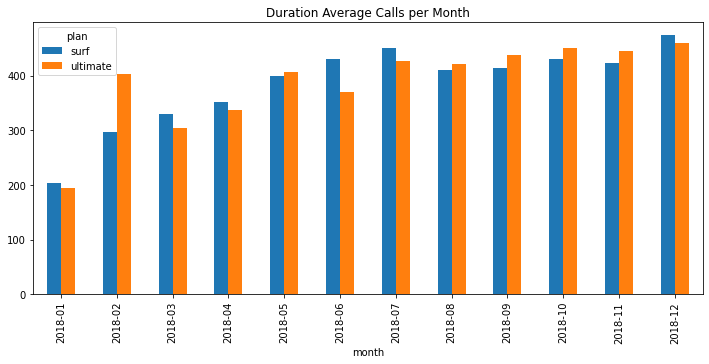

In [56]:
avg_calls.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Duration Average Calls per Month')
plt.show()

findings:
- Kedua paket mengalami peningkatan rata-rata durasi panggilan setiap bulan nya.
- Rata-rata durasi tertinggi dari kedua paket yang ada berada pada bulan 12 sedangkan yang terendah berada di bulan pertama.

insight:
- Rata-rata durasi panggilan pada kedua paket yang ada berada di bawah 500 menit panggilan, mungkin karena pengguna pada kedua paket jarang menggunakan panggilan atau sedikit pengguna yang menggunakan panggilan untuk berkomunikasi.


Mari bandingkan jumlah durasi panggilan per bulan antar paket prabayar. 

In [57]:
# Membandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. 
sum_calls = pd.pivot_table(data, index='month', columns='plan', values='duration', aggfunc='sum').reset_index()
sum_calls['month'] = sum_calls['month'].astype(str)
sum_calls


plan,month,surf,ultimate
0,2018-01,406.0,774.0
1,2018-02,2673.0,2822.0
2,2018-03,7590.0,3651.0
3,2018-04,17577.0,7074.0
4,2018-05,30768.0,11781.0
5,2018-06,41836.0,17435.0
6,2018-07,54448.0,25197.0
7,2018-08,66438.0,29922.0
8,2018-09,80360.0,37626.0
9,2018-10,101846.0,47778.0


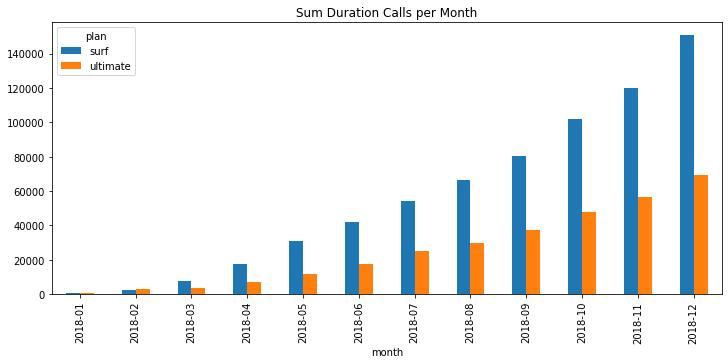

In [58]:
sum_calls.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Sum Duration Calls per Month')
plt.show()

findings:
- Total durasi dari kedua paket yang ada menampilkan nilai yang cukup meningkat staiap bulannya.
- Paket surf memiliki nilai yang cukup besar dari segi total durasi yang digunakan dibandingkan dengan paket ultimate.

insight:
- Total durasi yang digunakan oleh pengguna pada paket surf sangat besar, mungkin dikarenakan pengguna yang menggunakan paket surf lebih banyak dari pada paket ultimate.


Mari cari rata-rata durasi panggilan per user per paket prabayar.

In [59]:
avg_user_calls = pd.pivot_table(data, index='user_id', columns='plan', values='duration', aggfunc='mean').reset_index()
avg_user_calls

plan,user_id,surf,ultimate
0,1000,NaN,124.0
1,1001,345.600000,NaN
2,1002,276.333333,NaN
3,1003,1104.000000,NaN
4,1004,346.500000,NaN
...,...,...,...
485,1495,441.250000,NaN
486,1496,291.000000,NaN
487,1497,NaN,300.0
488,1498,291.909091,NaN


Mari pisahkan rata-rata panggilan per user sesuai paket yang digunakan. Bila ada nilai NaN maka lebih baik di drop saja karena data tersebut akan mengganggu proses analisis.

In [60]:
avg_usercall_surf = avg_user_calls.loc[:, ['user_id', 'surf']].dropna()
avg_usercall_surf

plan,user_id,surf
1,1001,345.600000
2,1002,276.333333
3,1003,1104.000000
4,1004,346.500000
5,1005,496.000000
...,...,...
484,1494,473.500000
485,1495,441.250000
486,1496,291.000000
488,1498,291.909091


In [61]:
avg_usercall_ulti = avg_user_calls.loc[:, ['user_id', 'ultimate']].dropna()
avg_usercall_ulti

plan,user_id,ultimate
0,1000,124.000000
6,1006,34.500000
8,1008,518.666667
11,1011,415.285714
13,1013,219.000000
...,...,...
472,1482,280.333333
477,1487,416.000000
480,1490,373.000000
483,1493,465.000000


Rata-rata panggilan per paket sudah berhasil di pisahkan, mari buat visualisasi agar lebih mudah membandingkannya.

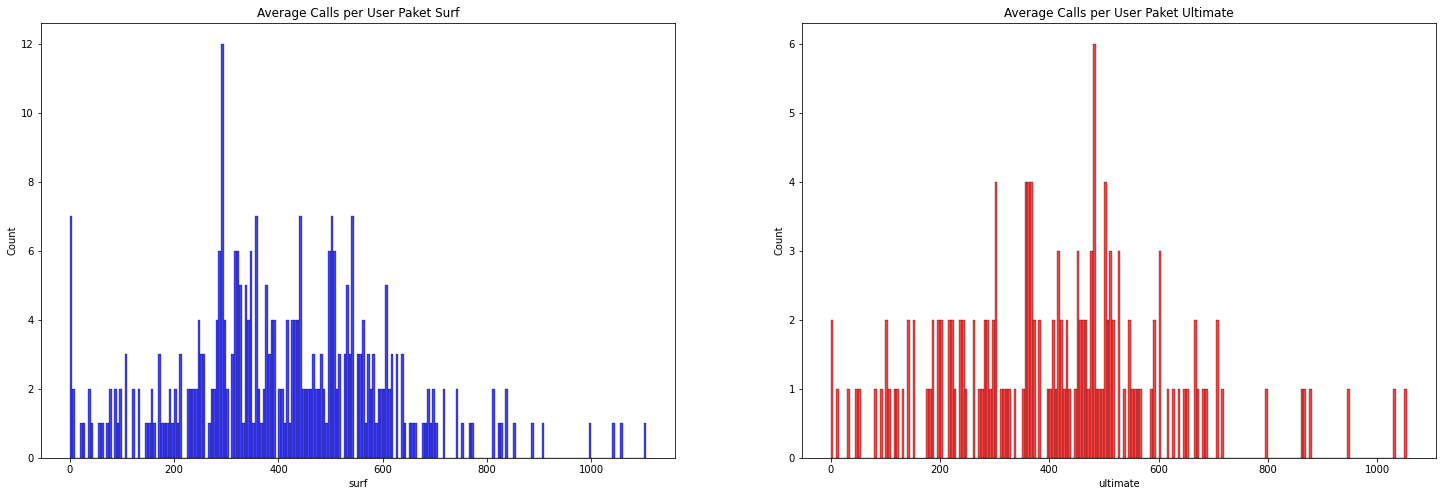

In [62]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title('Average Calls per User Paket Surf')
sns.histplot(avg_usercall_surf['surf'], binwidth=5, color='blue')

plt.subplot(1, 2, 2)
plt.title('Average Calls per User Paket Ultimate')
sns.histplot(avg_usercall_ulti['ultimate'], binwidth=5, color='red')
plt.show()

Findings:
- Total durasi pada paket surf memiliki nilai yang cukup besar dibandingkan dengan paket ultimate.
- Pada paket surf pula pengguna yang tidak menggunakan panggilan cukup banyak dibandingkan dengan paket ultimate.

Insight:
- Total durasi pada paket surf cukup mendominasi nilai yang ada, itu dikarenakan pengguna yang menggunakan paket surf lebih banyak dibandingkan dengan paket ultimate.

Mari cari tahu rata-rata, standar deviasi dan variansnya dari total durasi panggilan per pengguna.

In [63]:
# MEnghitung rata-rata, standar deviasi dan varians dari durasi panggilan per user.
avg_calls_surf = avg_usercall_surf['surf'].mean()
std_calls_surf = avg_usercall_surf['surf'].std()
var_calls_surf = avg_usercall_surf['surf'].var()

avg_calls_ulti = avg_usercall_ulti['ultimate'].mean()
std_calls_ulti = avg_usercall_ulti['ultimate'].std()
var_calls_ulti = avg_usercall_ulti['ultimate'].var()

print(f'Rata_rata Durasi Calls Surf: {avg_calls_surf}')
print(f'Standar Deviasi Durasi Calls Surf: {std_calls_surf}')
print(f'Variance Durasi Calls Surf: {var_calls_surf}')
print()
print(f'Rata_rata Durasi Calls ultimate: {avg_calls_ulti}')
print(f'Standar Deviasi Durasi Calls Ultimate: {std_calls_ulti}')
print(f'Variance Durasi Calls ultimate: {var_calls_ulti}')



Rata_rata Durasi Calls Surf: 408.73703801203794
Standar Deviasi Durasi Calls Surf: 199.36915836122932
Variance Durasi Calls Surf: 39748.06130566494

Rata_rata Durasi Calls ultimate: 407.95987651767905
Standar Deviasi Durasi Calls Ultimate: 200.35712367195748
Variance Durasi Calls ultimate: 40142.97700610006


**Kesimpulan**

Dari segi total keseluruhan durasi panggilan, nilai total durasi panggilan pada paket surf memiliki total durasi panggilan yang lebih tinggi dari pada paket ultimate. Dari kedua paket tersebut total durasi nya memiliki nilai standar deviasi yang sama yaitu 1719.97. Pada paket surf, nilai variansnya lebih tinggi dibandingkan dengan paket ultimate, itu berarti paket surf memiliki total durasi yang lebih bervariasi dibandingkan dengan paket ultimate.

Untuk melengkapi visualisasi yang ada, mari tambahkan grafik boxplot untuk membandingkan persebaran data yang ada pada kolom `duration` dan bandingkan antara paket surf dan paket ultimate. 

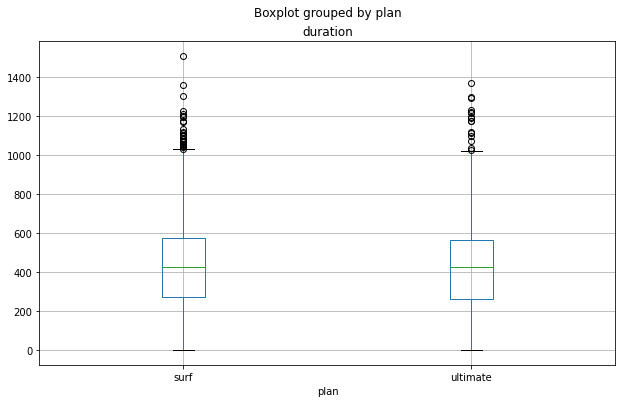

In [64]:
# Membuat grafik boxplot untuk memvisualisasikan distribusi durasi panggilan per user.

data.boxplot('duration', by='plan', figsize=(10, 6))
plt.show()


**Kesimpulan**

Terlihat dari tabel boxplot diatas, nilai dari rata-rata durasi panggilan pada kedua paket memiliki nilai yang cukup sama. untuk persebaran datanya pun cukup mirip hanya saja pada paket surf nilai outlier terlihat cukup banyak dibandingkan dengan paket ultimate. Dapat diartikan juga bahwa pengguna dari paket surf lebih banyak dibandingkan dengan paket ultimate. 

### Pesan/SMS

In [65]:
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


Mari lakukan hal yang sama untuk mencari nilai dari sms per pengguna per bulannya. Untuk langkah awal mari cari tahu rata-rata sms per bulannya lalu visualisasikan hasilnya.

In [66]:
# Membandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
avg_sms = pd.pivot_table(data, index='month', columns='plan', values='sms', aggfunc='mean').reset_index()
avg_sms['month'] = avg_sms['month'].astype(str)
avg_sms


plan,month,surf,ultimate
0,2018-01,10.500000,15.500000
1,2018-02,12.000000,21.571429
2,2018-03,15.260870,20.250000
3,2018-04,17.400000,22.047619
4,2018-05,24.012987,32.103448
5,2018-06,25.298969,29.340426
6,2018-07,27.033058,32.830508
7,2018-08,28.777778,38.478873
8,2018-09,30.762887,37.895349
9,2018-10,33.839662,39.443396


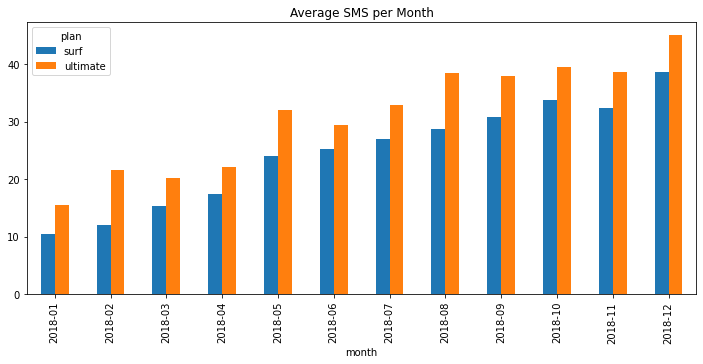

In [67]:
avg_sms.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Average SMS per Month')
plt.show()

findings:
- Pada kedua paket yang ada, terlihat bahwa rata-rata sms perbulan memiliki nilai yang cukup meningkat setiap bulannya.
- Paket ultimate memiliki rata-rata sms perbulan yang lebih banyak dibandingkan dengan paket surf.

insight:
- Secara rata-rata sms perbulan, paket ultimate memiliki nilai yang lebih besar dibandingkan dengan paket surf, mungkin saja data sms pada paket ultimate lebih merata perbulanya, atau pada paket surf terdapat banyak nilai outlier didalamnya.

Mari cari tahu total sms berdasarkan paket yang ada per bulannya, lalu visualisasikan agar mudah menbandingkan nya.

In [68]:
sum_sms = pd.pivot_table(data, index='month', columns='plan', values='sms', aggfunc='sum').reset_index()
sum_sms


plan,month,surf,ultimate
0,2018-01,21.0,62.0
1,2018-02,108.0,151.0
2,2018-03,351.0,243.0
3,2018-04,870.0,463.0
4,2018-05,1849.0,931.0
5,2018-06,2454.0,1379.0
6,2018-07,3271.0,1937.0
7,2018-08,4662.0,2732.0
8,2018-09,5968.0,3259.0
9,2018-10,8020.0,4181.0


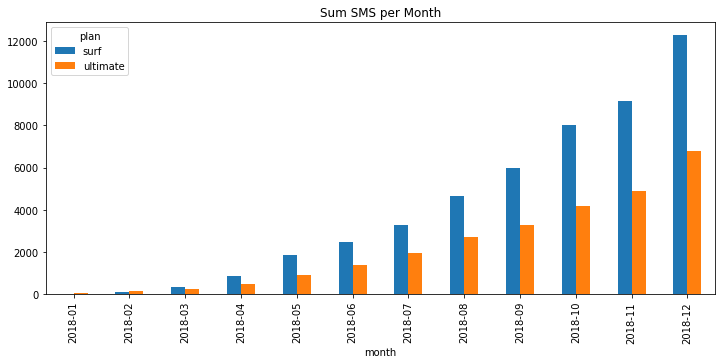

In [69]:
sum_sms.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Sum SMS per Month')
plt.show()

fingdings:
- Pada kedua paket yang ada, terlihat bahwa total sms yang dilakukan memiliki nilai yang terus meningkat setiap bulannya.
- Paket surf memiliki total sms yang lebih banyak dibandingkan dengan paket ultimate.

insight:
- Secara total sms yang dilakukan perbulan, paket surf memiliki nilai yang lebih besar dibandingkan dengan paket ultimate, mungkin saja data sms pada paket surf memiliki data outlier didalamnya.

Mari cari tahu rata-rata sms yang dilakukan per pengguna, kelompokan berdasarkan paket yang digunakan lalu visualisasikan.

In [70]:
avg_user_sms = pd.pivot_table(data, index='user_id', columns='plan', values='sms', aggfunc='mean').reset_index()
avg_user_sms

plan,user_id,surf,ultimate
0,1000,NaN,11.0
1,1001,41.400000,NaN
2,1002,29.333333,NaN
3,1003,50.000000,NaN
4,1004,22.125000,NaN
...,...,...,...
485,1495,0.000000,NaN
486,1496,13.000000,NaN
487,1497,NaN,50.0
488,1498,0.000000,NaN


In [71]:
avg_usersms_surf = avg_user_sms.loc[:, ['user_id', 'surf']].dropna()
avg_usersms_surf


plan,user_id,surf
1,1001,41.400000
2,1002,29.333333
3,1003,50.000000
4,1004,22.125000
5,1005,11.000000
...,...,...
484,1494,29.000000
485,1495,0.000000
486,1496,13.000000
488,1498,0.000000


In [72]:
avg_usersms_ulti = avg_user_sms.loc[:, ['user_id', 'ultimate']].dropna()
avg_usersms_ulti


plan,user_id,ultimate
0,1000,11.000000
6,1006,77.000000
8,1008,28.000000
11,1011,53.000000
13,1013,16.000000
...,...,...
472,1482,31.333333
477,1487,66.000000
480,1490,0.000000
483,1493,0.000000


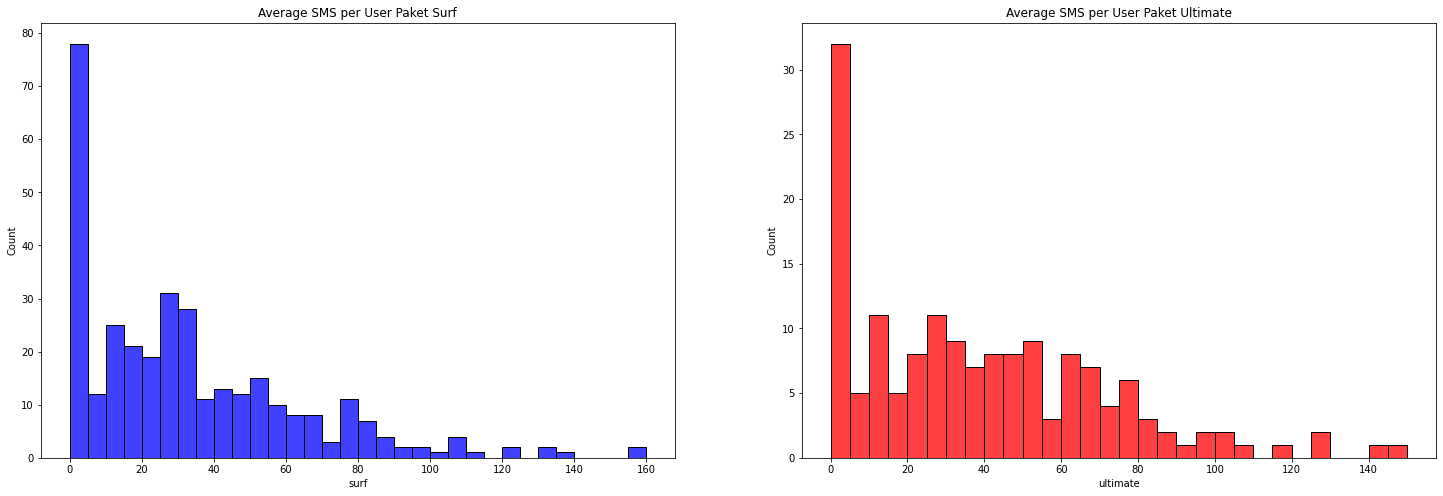

In [73]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title('Average SMS per User Paket Surf')
sns.histplot(avg_usersms_surf['surf'], binwidth=5, color='blue')

plt.subplot(1, 2, 2)
plt.title('Average SMS per User Paket Ultimate')
sns.histplot(avg_usersms_ulti['ultimate'], binwidth=5, color='red')
plt.show()

findings:
- Dari kedua grafik yang ada, terlihat persebaran data dari rata-rata sms per pengguna pada paket surf lebih banyak dibandingkan dengan paket ultimate..
- Dari kedua paket yang tersedia, rata-rata sms per pengguna yang paling banyak berada pada 0-10 sms.

insight:
- Jumlah pengguna pada paket surf memiliki persebaran data yang lebih luar dan jumlah pengguna yang menggunakan paket surf untuk sms lebih banyak, atau bisa dibilang pengguna dari paket surf dari segi sms lebih banyak dibandingkan dengan paket ultimate.


Mari cai tahu nilai rata-rata, standar deviasi dan juga varians dari data sms berdasarkan paket yang dipilih.

In [74]:
avg_sms_surf = avg_usersms_surf['surf'].mean()
std_sms_surf = avg_usersms_surf['surf'].std()
var_sms_surf = avg_usersms_surf['surf'].var()

avg_sms_ulti = avg_usersms_ulti['ultimate'].mean()
std_sms_ulti = avg_usersms_ulti['ultimate'].std()
var_sms_ulti = avg_usersms_ulti['ultimate'].var()

print(f'Rata_rata Durasi Calls Surf: {avg_sms_surf}')
print(f'Standar Deviasi Durasi Calls Surf: {std_sms_surf}')
print(f'Variance Durasi Calls Surf: {var_sms_surf}')
print()
print(f'Rata_rata Durasi Calls ultimate: {avg_sms_ulti}')
print(f'Standar Deviasi Durasi Calls Ultimate: {std_sms_ulti}')
print(f'Variance Durasi Calls ultimate: {var_sms_ulti}')


Rata_rata Durasi Calls Surf: 32.40893079226412
Standar Deviasi Durasi Calls Surf: 31.017777398872617
Variance Durasi Calls Surf: 962.1025147660129

Rata_rata Durasi Calls ultimate: 38.471532200990794
Standar Deviasi Durasi Calls Ultimate: 32.92727456174797
Variance Durasi Calls ultimate: 1084.205410064735


findings:
- Untuk nilai rata-rata dari sms per pengguna, paket ultimate memiliki nilai yang lebih besar dibandingkan dengan paket surf.
- Untuk nilai standar deviasi dari sms per pengguna, paket ultimate juga memiliki nilai yang lebih besar dibandingkan dengan paket surf.
- Untuk nilai variansnya, paket ultimate juga memiliki nilai yang lebih besar dibandingkan dengan paket surf.

insight:
- Dari data yang terlihat, pada paket surf kemungkinan lebih banyak outlier pada nilai sms dibandingkan dengan paket ultimate.

Mari buktikan asumsi yang ada dengan menampilkan grafik boxplot dan bandingkan antara paket surf dan paket ultimate.

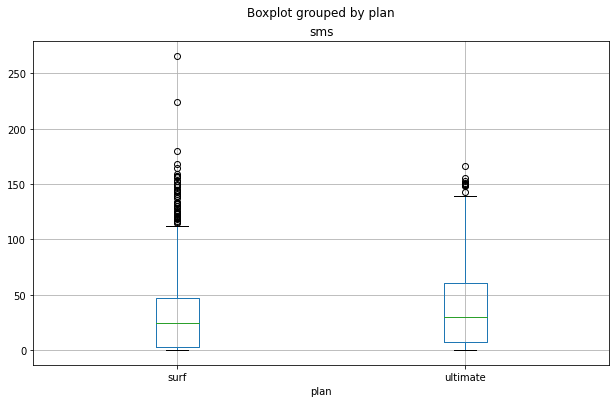

In [75]:
data.boxplot('sms', by='plan', figsize=(10, 6))
plt.show()

**Kesimpulan**

Terlihat dari tabel boxplot diatas, nilai dari rata-rata sms ternyata sama seperti asumsi pertama. Paket ultimaet memiliki nilai yang lebih besar dibandingkan dengan paket surf. Dari segi persebaran data nya juga paket ultimate lebih bervariasi dibandingkan dengan paket surf.
Dari asumsi yang telah dibikin diatas, ternayata asumsi bahwa pada paket surf lebih banyak outlier dibandingkan dengan paket ultimate itu terbukti benar. Terlihat dari boxplot diatas perbedaan antar paket sangat jelas terlihat.

### Internet

In [76]:
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


In [77]:
# Membandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
avg_internet = pd.pivot_table(data, index='month', columns='plan', values='gb_used', aggfunc='mean').reset_index()
avg_internet['month'] = avg_internet['month'].astype(str)
avg_internet

plan,month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


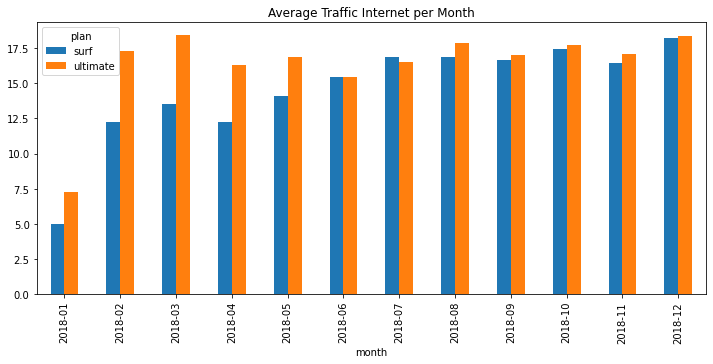

In [78]:
avg_internet.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Average Traffic Internet per Month')
plt.show()

findings:

- Pada kedua paket yang ada, terlihat bahwa rata-rata internet yang digunakan perbulan memiliki nilai yang fluktuatif atau naik turun setiap bulannya.
- Paket ultimate memiliki rata-rata internet yang cenderung lebih banyak dibandingkan dengan paket surf.

insight:

- Dari kedua paket yang ada, terlihat di 5 bulan pertama rata-rata internet yang digunakan cenderung naik turun, namun di 6 bulan terakhir rata-rata internet cenderung naik dibandingkan dengan 5 bulan awalnya. 

Mari bandingkan total internet yang digunakan per bulannya, lalu visualisasikan agar terlihat perbendaanya.

In [79]:
sum_internet = pd.pivot_table(data, index='month', columns='plan', values='gb_used', aggfunc='sum').reset_index()
sum_internet

plan,month,surf,ultimate
0,2018-01,10.0,29.0
1,2018-02,110.0,121.0
2,2018-03,312.0,221.0
3,2018-04,611.0,343.0
4,2018-05,1087.0,489.0
5,2018-06,1502.0,725.0
6,2018-07,2042.0,973.0
7,2018-08,2735.0,1267.0
8,2018-09,3238.0,1463.0
9,2018-10,4126.0,1878.0


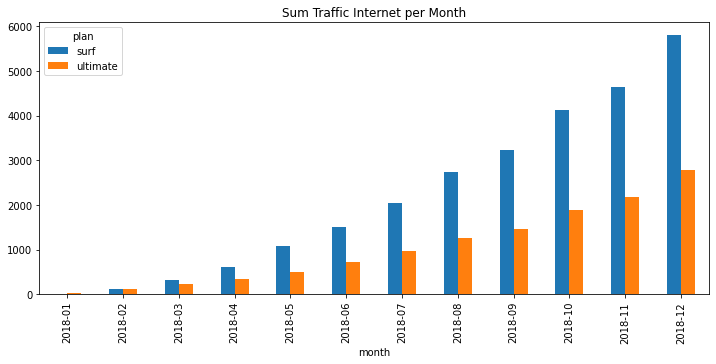

In [80]:
sum_internet.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Sum Traffic Internet per Month')
plt.show()

findings:

- Pada kedua paket yang ada, terlihat bahwa total internet yang digunakan perbulan memiliki nilai yang cenderung naik setiap bulannya.
- Paket surf memiliki total internet yang lebih banyak dibandingkan dengan paket ultimate.

insight:

- Perbandingan total internet yang digunakan pada paket surf jauh lebih banyak dibandingkan paket ultimate, kemungkinan pengguna dari paket surf lebih banyak dibandingkan dengan paket ultimate.

Mari cari tahu rata-rata internet yang dilakukan per pengguna, kelompokan berdasarkan paket yang digunakan lalu visualisasikan.

In [81]:
avg_user_internet = pd.pivot_table(data, index='user_id', columns='plan', values='gb_used', aggfunc='mean').reset_index()
avg_user_internet

plan,user_id,surf,ultimate
0,1000,NaN,2.0
1,1001,16.200000,NaN
2,1002,13.666667,NaN
3,1003,27.000000,NaN
4,1004,19.625000,NaN
...,...,...,...
485,1495,24.750000,NaN
486,1496,13.200000,NaN
487,1497,NaN,11.0
488,1498,20.727273,NaN


In [82]:
avg_userinternet_surf = avg_user_internet.loc[:, ['user_id', 'surf']].dropna()
avg_userinternet_surf

plan,user_id,surf
1,1001,16.200000
2,1002,13.666667
3,1003,27.000000
4,1004,19.625000
5,1005,17.000000
...,...,...
484,1494,15.333333
485,1495,24.750000
486,1496,13.200000
488,1498,20.727273


In [83]:
avg_userinternet_ulti = avg_user_internet.loc[:, ['user_id', 'ultimate']].dropna()
avg_userinternet_ulti

plan,user_id,ultimate
0,1000,2.000000
6,1006,17.500000
8,1008,18.666667
11,1011,18.857143
13,1013,20.000000
...,...,...
472,1482,7.000000
477,1487,14.000000
480,1490,31.833333
483,1493,15.200000


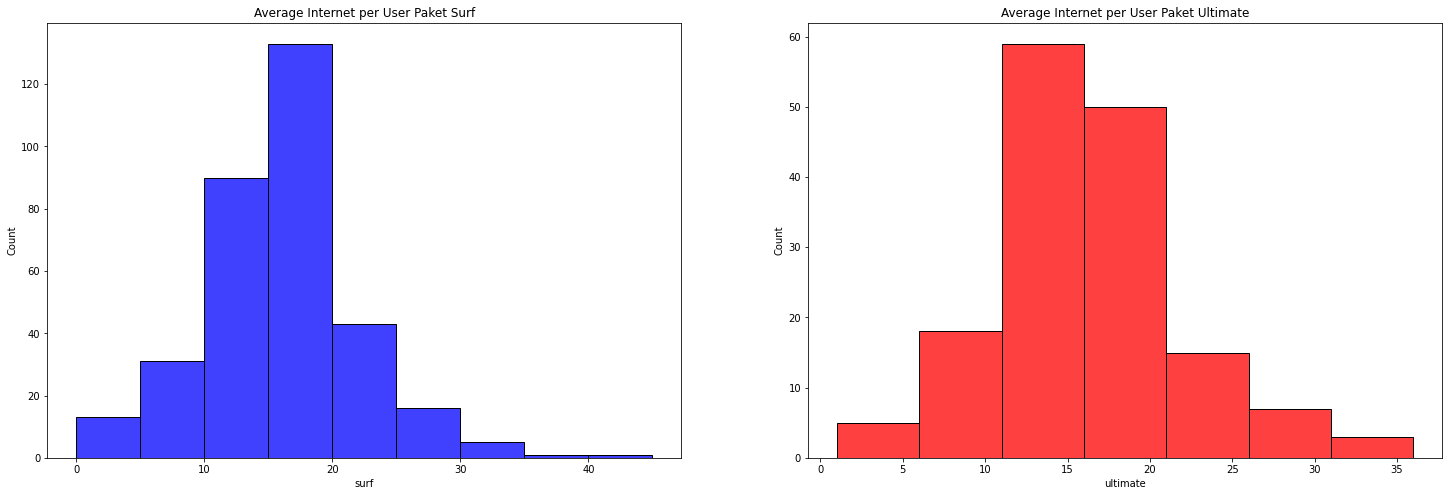

In [84]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title('Average Internet per User Paket Surf')
sns.histplot(avg_userinternet_surf['surf'], binwidth=5, color='blue')

plt.subplot(1, 2, 2)
plt.title('Average Internet per User Paket Ultimate')
sns.histplot(avg_userinternet_ulti['ultimate'], binwidth=5, color='red')
plt.show()

findings:
- Dari kedua grafik yang ada, pada paket surf persebaran rata-rata internet sedikit lebih tinggi dibandingkan dengan paket ultimate.

insight:
- Asumsi bahwa pada paket surf lebih banyak penggunanya dibandingkan pada paket ultimate ternyata terbukti benar.


Mari cari tahu nilai dari rata-rata, standar deviasi dan variansnya.

In [85]:
avg_internet_surf = avg_userinternet_surf['surf'].mean()
std_internet_surf = avg_userinternet_surf['surf'].std()
var_internet_surf = avg_userinternet_surf['surf'].var()

avg_internet_ulti = avg_userinternet_ulti['ultimate'].mean()
std_internet_ulti = avg_userinternet_ulti['ultimate'].std()
var_internet_ulti = avg_userinternet_ulti['ultimate'].var()

print(f'Rata_rata Internet Surf: {avg_internet_surf}')
print(f'Standar Deviasi Internet Surf: {std_internet_surf}')
print(f'Variance Internet Surf: {var_internet_surf}')
print()
print(f'Rata_rata Internet ultimate: {avg_internet_ulti}')
print(f'Standar Deviasi Internet Ultimate: {std_internet_ulti}')
print(f'Variance Internet ultimate: {var_internet_ulti}')

Rata_rata Internet Surf: 15.996964821964822
Standar Deviasi Internet Surf: 6.102915088720695
Variance Internet Surf: 37.24557258013473

Rata_rata Internet ultimate: 16.154847152140146
Standar Deviasi Internet Ultimate: 5.782372086344824
Variance Internet ultimate: 33.4358269449398


**Kesimpulan**

Dari segi rata-rata penggunaan internet yang dilakukan oleh pengguna dari paket ultimate lebih banyak dibandingkan dengan paket surf, namun dari segi nilai standar deviasi paket surf lebih besar dibandingkan dengan paket ultimate. Nilai variansnya juga lebih banyak paket surf dibandingkan dengan paket ultimate. Dapat diartikan bahwa pada data internetr paket surf lebih banyak outlier dibandingkan dengan paket ultimate. Dari segi pengguna juga sepertinya paket surf lebih banyak penggunnya dibandingkan dengan paket ultimate.

Mari buktikan lebih rinci dengan membandingkan grafik boxplot, agar terlihat perbedaanya.

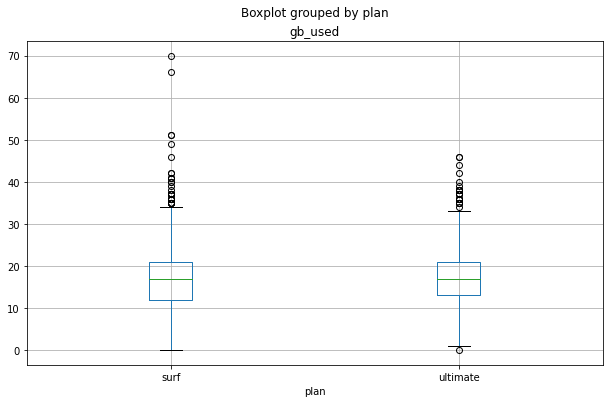

In [86]:
data.boxplot('gb_used', by='plan', figsize=(10, 6))
plt.show()

**Kesimpulan**

Asumsi bahwa pada paket surf lebih banyak outlier dibandingkan dengan paket ultimate ternyata terbukti benar. Dari segi rata-rata dan persebaran data dari kedua paket yang ada cendrung tidak jauh berbeda atau terdapat sedikit perbedaan. Asumsi bahwa pada paket surf lebih banyak pengguna dibandingkan dengan paket ultimate juga terbukti asumsi itu benar. 

## Pendapatan

Seperti langkah sebelumnya untuk mempelajari perilaku pengguna, mari deskripsikan secara statistik pendapatan yang diperoleh antara tiap-tiap paket prabayar.

In [87]:
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


Mari cari tahu rata-rata income per bulan per paket prabayar lalu visualisasikan agar lebih mudah membandingkannya.

In [88]:
avg_income = pd.pivot_table(data, index='month', columns='plan', values='total_income', aggfunc='mean').reset_index()
avg_income

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


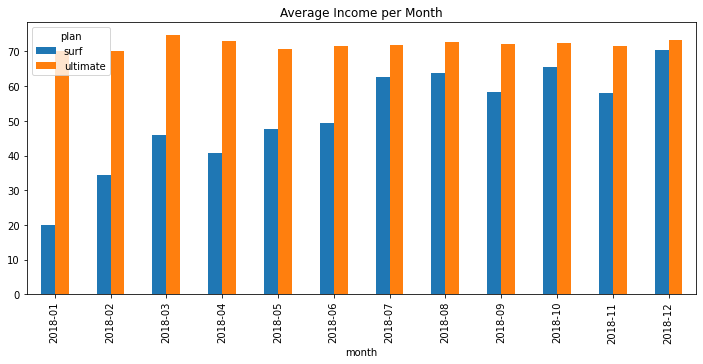

In [89]:
avg_income.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Average Income per Month')
plt.show()

findings:

- Paket ultimate memiliki rata-rata income yang jauh lebih tinggi dibandingkan dengan paket surf per bulanya.
- Pada paket ultimate rata-rata income memiliki nilai yang cukup serupa per bulannya, atau rata-rata income paket ultimate lebih stabil dibandingkan dengan paket surf yang terlihat fluktuatif atau naik turun per bulannya.

insight:
- Kemungkin naik turunnya rata-rata income per bulan dari paket surf dipengaruhi oleh pengguna yang lebih banyak dibandingkan dengan paket ultimate dan mungkin banyak pengguna dari paket surf yang melebihi standar yang diberikan oleh paket tersebut sehingga banyak dari penggunanya harus membayar biaya exra dalam sebulan.

Mari cari tahu jumlah income per bulan per paket prabayar, lalu visualisasikan agar lebih mudah membandingkannya.

In [90]:
sum_income = pd.pivot_table(data, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
sum_income

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,309.57,490.0
2,2018-03,1056.65,896.0
3,2018-04,2035.53,1533.0
4,2018-05,3667.37,2051.0
5,2018-06,4779.80,3367.0
6,2018-07,7583.56,4242.0
7,2018-08,10356.85,5173.0
8,2018-09,11304.67,6195.0
9,2018-10,15504.83,7665.0


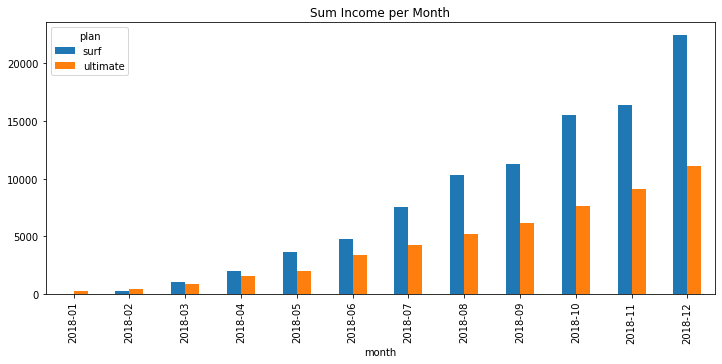

In [91]:
sum_income.plot(kind='bar', x='month', figsize=(12, 5))
plt.title('Sum Income per Month')
plt.show()

findings:

- Pada bulan maret sampai desember, paket surf memberikan kontribusi income yang lebih tinggi dibandingkan dengan paket ultimate.
- Kedua paket menunjukan pertumbuhan total income yang sangat tajam setiap bulannya.

insight:

- Kontribusi total income paket surf lebih tinggi dari pada paket ultimate kemungkinan besar disebabkan oleh pengguna paket surf yang semakin banyak setiap bulannya.
- Paket yang lebih murah belum tentu memberikan kontribusi pendapatan yang lebih rendah.

Mari buat perbandingan rata-rata income per usernya, lalu kelompokan berdasarkan paket yang ada dan visualisasikan agar lebih mudah melihat perbedaannya.

In [92]:
avg_user_income = pd.pivot_table(data, index='user_id', columns='plan', values='total_income', aggfunc='mean').reset_index()
avg_user_income

plan,user_id,surf,ultimate
0,1000,NaN,70.0
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,158.120000,NaN
4,1004,76.250000,NaN
...,...,...,...
485,1495,118.325000,NaN
486,1496,28.000000,NaN
487,1497,NaN,70.0
488,1498,77.272727,NaN


In [93]:
avg_userincome_surf = avg_user_income.loc[:, ['user_id', 'surf']].dropna()
avg_userincome_surf

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,158.120000
4,1004,76.250000
5,1005,40.000000
...,...,...
484,1494,30.625000
485,1495,118.325000
486,1496,28.000000
488,1498,77.272727


In [94]:
avg_userincome_ulti = avg_user_income.loc[:, ['user_id', 'ultimate']].dropna()
avg_userincome_ulti

plan,user_id,ultimate
0,1000,70.000000
6,1006,77.000000
8,1008,70.000000
11,1011,70.000000
13,1013,70.000000
...,...,...
472,1482,70.000000
477,1487,70.000000
480,1490,114.333333
483,1493,70.000000


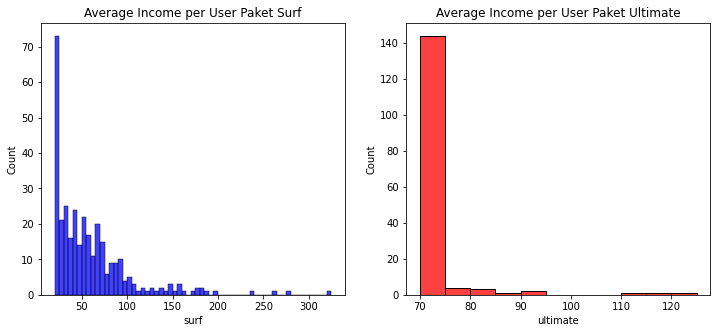

In [95]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Average Income per User Paket Surf')
sns.histplot(avg_userincome_surf['surf'], binwidth=5, color='blue')

plt.subplot(1, 2, 2)
plt.title('Average Income per User Paket Ultimate')
sns.histplot(avg_userincome_ulti['ultimate'], binwidth=5, color='red')
plt.show()

findings:
- Pada paket surf persebaran datanya lebih besar dibandingkan dengan paket ultimate.
 
insights: 
- Banyak dari pengguna paket surf yang harus membayar biaya extra karena melebihi standar yang diberikan oleh paket tersebut, sedangkan pada paket ultimate sedikit dari penggun paket ini yang harus membayar biaya extra.

Mari Cari tahu nilai rata-rata, standar deviasi dan variansnya. 

In [96]:
avg_income_surf = round(avg_userincome_surf['surf'].mean(), 1)
std_income_surf = round(avg_userincome_surf['surf'].std(), 1)
var_income_surf = round(avg_userincome_surf['surf'].var(), 1)

avg_income_ulti = round(avg_userincome_ulti['ultimate'].mean(), 1)
std_income_ulti = round(avg_userincome_ulti['ultimate'].std(), 1)
var_income_ulti = round(avg_userincome_ulti['ultimate'].var(), 1)

print(f'Rata_rata Income Paket Surf      : {avg_income_surf}')
print(f'Standar Deviasi Income Paket Surf: {std_income_surf}')
print(f'Variance Income Paket Surf       : {var_income_surf}')
print()
print(f'Rata_rata Income Paket Ultimate      : {avg_income_ulti}')
print(f'Standar Deviasi Income Paket Ultimate: {std_income_ulti}')
print(f'Variance Income Paket Ultimate       : {var_income_ulti}')

Rata_rata Income Paket Surf      : 58.2
Standar Deviasi Income Paket Surf: 43.6
Variance Income Paket Surf       : 1897.9

Rata_rata Income Paket Ultimate      : 71.8
Standar Deviasi Income Paket Ultimate: 7.4
Variance Income Paket Ultimate       : 55.1


**Kesimpulan**

Dari data diatas, ada beberapa kesimpulan yang didapat diantaranya:
1. Pada paket surf ultimate kebanyakan pengguna mengeluarkan biaya sekitar 70 dolar atau tidak jauh dari ketentuan paket yang ada pada paket ultimate. Sedangkan pada paket surf, kebanyakan pengguna mengeluarkan biaya sekitar 58 dolar atau dapat dikatakan bahwa pengguna pada paket surf lebih banyak mengeluarkan biaya lebih dari ketentuan yang ada pada pakat surf.
2. Nilai standar deviasi dan juga varians dari paket surf lebih besar dibandingkan dengan paket ultimate. Dapat diartikan bahwa persebaran data dari paket surf lebih besar dibandingkan dengan paket ultimate.
3. Faktor dari persebaran data income paket surf yang lebih banyak dibandingkan dengan paket ultimate kemungkinan dipengaruhi oleh banyaknya pengguna paket surf dibandingkan dengan paket ultimate atau juga kemungkinan dipengaruhi oleh banyaknya pengguna dari paket surf yang harus mengeluarkan biaya extra untuk paket surf.


Mari cari tahu korelasi yang mempengaruhi total income yang harus dikeluarkan pengguna di setiap bulannya berdasarkan paket yang digunakan.

Catatan untuk value dari korelasi:
1. Bila valuenya positif, artinya hubungan antar variable selaras. (bila satu naik maka yang lainya nya juga naik).
2. Bila valuenya negatif, artinya hubungan antar variable berlawanan. (bila satu naik maka yang lainya turun).
3. Bila value nya mendekati 0, artinya tidak ada korelasi. 
4. 0.01-0.33 artinya korelasinya lemah.
5. 0.33-0.66 artinya korelasinya medium/menengah.
6. 0.66-1.00 artinya korelasinya tinggi.

Mari mulai dengan paket surf terlebih dahulu.

In [97]:
corr_internet_surf = data.loc[data['plan']=='surf', ['gb_used', 'total_income', 'duration', 'sms', 'age']]
corr_internet_surf.corr()

,gb_used,total_income,duration,sms,age
gb_used,1.000000,0.892962,0.366436,0.157823,0.045908
total_income,0.892962,1.000000,0.282237,0.167037,0.032016
duration,0.366436,0.282237,1.000000,0.244275,-0.017952
sms,0.157823,0.167037,0.244275,1.000000,-0.019312
age,0.045908,0.032016,-0.017952,-0.019312,1.000000


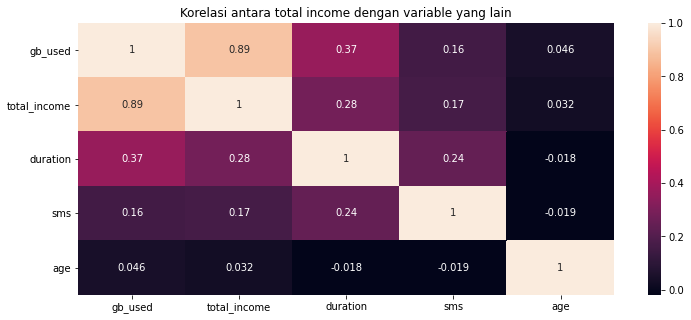

In [98]:
plt.figure(figsize=(12, 5))
sns.heatmap(corr_internet_surf.corr(), annot=True)
plt.title('Korelasi antara total income dengan variable yang lain')
plt.show()

Ada beberapa catatan penting untuk korelasi yang terjadi pada paket surf diantaranya:
1. Value Korelasi yang paling tinggi adalah kolom pemakaian internet atau `gb_used`. Value dari kolom ini sangat tinggi yaitu 0.89.
2. Value Korelasi yang paling rendah adalah kolom umur atau `age`. Value dari kolom ini mendekati 0, artinya tidak ada korelasinya antara total income dengan umur pengguna.
3. Korelasi lain yang mempengaruhi `total_income` adalah kolom durasi atau `duration`. Namun value dari kolom ini adalah 0.37 atau korelasinya tergolong medium.

Karena korelasi yang paling tinggi adalah pemakaian internet, jadi untuk memperjelas korelasi yang terjadi antara kolom `gb_used` dengan `total_income`, mari buat grafik scatter plot untuk meneunjukan seberapa tinggi korelasi yang terjadi.

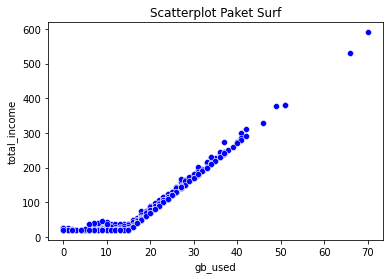

In [99]:
sns.scatterplot(data=corr_internet_surf, x='gb_used', y='total_income', color='blue')
plt.title('Scatterplot Paket Surf')
plt.show()

**Kesimpulan**

Dari grafik scatterplot diatas, dapat disimpulkan bahwa saat pemakaian internet bertambah maka nilai dari income pun juga bertambah. Jelas terlihat pada grafik bahwa banyak dari pengguna paket surf ini menambah jumlah pemakaian internetnya. Standar dari paket surf adalah 15 gb, saat pemakaian internet dibawah 15 gb total income masih terlihat stabil, namun bila sudah mencapai ambang batas internet (15 gb) maka income pun terus bertambah sesuai dengan pemakaian internet dari pengguna paket ini.  

Mari buat korelasi untuk paket ultimate.

In [100]:
corr_internet_ulti = data.loc[data['plan']=='ultimate', ['gb_used', 'total_income', 'duration', 'sms', 'age']]
corr_internet_ulti.corr()

,gb_used,total_income,duration,sms,age
gb_used,1.000000,0.557505,0.221429,0.344191,-0.049249
total_income,0.557505,1.000000,-0.075393,0.172457,0.011581
duration,0.221429,-0.075393,1.000000,0.238642,0.032493
sms,0.344191,0.172457,0.238642,1.000000,0.007752
age,-0.049249,0.011581,0.032493,0.007752,1.000000


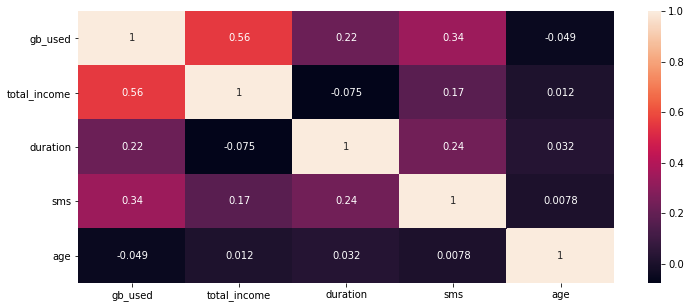

In [101]:
plt.figure(figsize=(12, 5))
sns.heatmap(corr_internet_ulti.corr(), annot=True)
plt.show()

Ada beberapa catatan penting untuk korelasi yang terjadi pada paket ultimate diantaranya:

1. Value Korelasi yang paling tinggi adalah kolom pemakaian internet atau `gb_used`. Namun value dari kolom ini adalah 0.56 atau tergolong medium 
2. Value Korelasi yang paling rendah adalah kolom umur atau `age`. Value dari kolom ini mendekati 0, artinya tidak ada korelasinya antara total income dengan umur pengguna.
3. Korelasi lain yang mempengaruhi `total_income` adalah kolom `sms`. Namun value dari kolom ini adalah 0.34 atau korelasinya tergolong medium.

Karena korelasi yang paling tinggi adalah pemakaian internet, jadi untuk memperjelas korelasi yang terjadi antara kolom `gb_used` dengan `total_income`, mari buat grafik scatter plot untuk meneunjukan seberapa tinggi korelasi yang terjadi.

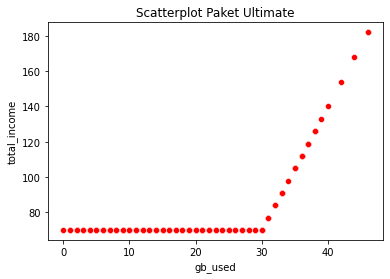

In [102]:
sns.scatterplot(data=corr_internet_ulti, x='gb_used', y='total_income', color='red')
plt.title('Scatterplot Paket Ultimate')
plt.show()

**Kesimpulan**

Dari grafik scatterplot diatas, dapat disimpulkan bahwa saat pemakaian internet bertambah maka nilai dari income pun juga bertambah. Jelas terlihat pada grafik bahwa tidak banyak atau hanya beberapa dari pengguna paket ultimate ini yang menambah jumlah pemakaian internetnya. Standar dari paket ultimate adalah 30 gb, saat pemakaian internet dibawah 30 gb total income masih terlihat stabil, namun bila sudah mencapai ambang batas internet (30 gb) maka income pun terus bertambah sesuai dengan pemakaian internet dari pengguna paket ini.

## Menguji Hipotesis Statistik

Mari lakukan uji hipotesis statistik dari dataframe yang ada. Hipotesis yang harus diuji yaitu menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda. Untuk memperjelas dataframe yang akan diuji hipotesis nya, mari tampilkan dahulu dataframenya.

In [103]:
data.head()

,user_id,month,duration,call_count,gb_used,sms,age,plan,inisial_city,is_NY-NJ,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_sms,extra_internet,total_income
0,1000,2018-12,124.0,16.0,2.0,11.0,45,ultimate,GA,0,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
1,1001,2018-08,182.0,27.0,7.0,30.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,2018-09,315.0,49.0,14.0,44.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
3,1001,2018-10,393.0,65.0,22.0,53.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
4,1001,2018-11,426.0,64.0,19.0,36.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


Karena hipotesis yang diuji adalah mengenai rata-rata pendapatan dari pengguna paket ultimate dan paket surf. Mari persiapkan dahulu data yang akan diuji dengan mengelompokan rata-rata pendapatan antara paket ultimate dan juga paket surf.

### Pengujian Hipotesis Rata-rata Pendapatan

**Prepare Dataset Paket Surf dan Ultimate.**

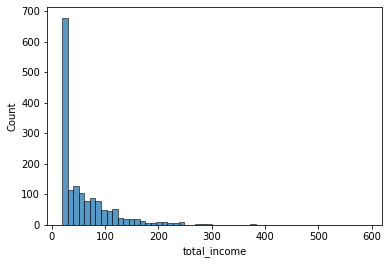

In [104]:
surf_income = data.loc[(data['plan']== 'surf') & (data['total_income'] > 0), 'total_income']
sns.histplot(surf_income)
plt.show()

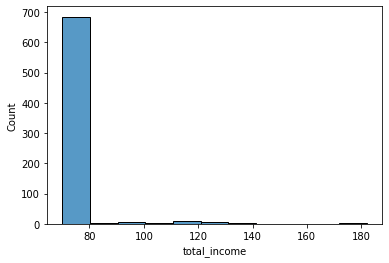

In [105]:
ulti_income = data.loc[(data['plan']== 'ultimate') & (data['total_income'] > 0), 'total_income']
sns.histplot(ulti_income)
plt.show()

Dataset untuk pengujian sudah perhasil dibuat. Sebelum kepengujiannya, mari lakukan cek distribusi kenormalan dataset yang ada agar saat pengujian dapat diketahui metode mana yang akan digunakan.

Untuk mempermudah proses pengecekan kenormalan data, karena pengujian hipotesisnya ada 2. Mari buat function cek ditribusi kenormalan data agar mempermudah langkah kedepannya.
Untuk nilai dari tingkat signifikansi statistik kritis atau alpha, mari set di 5%.

In [106]:
def normality_test(series):
    p_value_shapiro = shapiro(series).pvalue
    alpha = 0.05
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha: {alpha}')
    if p_value_shapiro >= alpha:
        print('H0 diterima: Distribusi data tersebut normal.')
    else:
        print('H1 diterima: Distribusi data tersebut tidak normal.')

Function untuk mengecek distribusi kenormalan data sudah berhasi dibuat. Mari tampilkan distribusi kenormalan dari kedua dataset yang ada lalu bandingkan keduanya.

In [107]:
print('Paket Surf')
normality_test(surf_income)
print('---------------------------------------------------')
print('Paket Ultimate')
normality_test(ulti_income)

Paket Surf
P-Value: 1.5414283107572988e-44
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.
---------------------------------------------------
Paket Ultimate
P-Value: 0.0
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.


Dari hasil yang ditampilkan, kedua dataset memiliki P-Value yang sangat kecil dan bahkan ada yang memiliki nilai 0 dan hasil dari pengecekan distribusi kenormalan dari kedua dataset menyatakan bahwa ternyata kedua dataset memiliki distribusi data tidak normal. Maka dari itu pengujian hipotesis harus dilakukan dengan menggunkan metode NonParametric Test.

Mari masuk ke pengujian hipotesis. Sebelum itu ada beberapa rumusan yang harus dicatat, diantaranya:
1. Pengujian dilakukan menggunakan Two Independent Samples dengan metode Mann-Whitney U test.
2. Nilai tingkat signifikansi statistik kritis atau alpha di set pada 5%.
3. Uji Hipotesisnya : 
    - H0 Diterima: Rata-rata pendapatan dari pengguna paket Ultimate dan Surf sama.
    - H1 Diterima: Rata-rata pendapatan dari pengguna paket Ultimate dan Surf berbeda.

Mari bandingkan langsung hasil dari P-Value dari kedua dataset yang akan ada.

In [116]:
# Uji hipotesis
alpha = 0.05
p_value = mannwhitneyu(surf_income, ulti_income, nan_policy='omit').pvalue
print(f'Alpha: {alpha}')
print(f'P_Value: {p_value}')
print(f'Rata-rata Income Paket Surf: {surf_income.mean()}')
print(f'Rata-rata Income Paket ultimate: {ulti_income.mean()}')
print('-------------------------------------------------------------------------------------')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata Pendapatan dari Pengguna Paket telepon Ultimate dan Surf SAMA.')
else:
    print('H1 Diterima: Rata-rata Pendapatan dari Pengguna Paket telepon Ultimate dan Surf BERBEDA.')

Alpha: 0.05
P_Value: 1.9121793747947493e-48
Rata-rata Income Paket Surf: 60.706408137317226
Rata-rata Income Paket ultimate: 72.31388888888888
-------------------------------------------------------------------------------------
H1 Diterima: Rata-rata Pendapatan dari Pengguna Paket telepon Ultimate dan Surf BERBEDA.


Mari coba visualisasikan rata-rata dari kedua dataset agar lebih terlihat perbedaanya. 

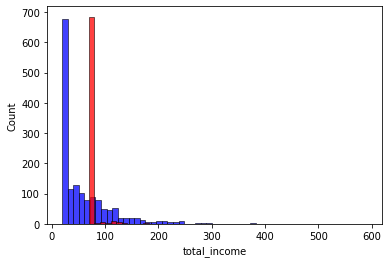

In [109]:
sns.histplot(surf_income, color='blue')
sns.histplot(ulti_income, color='red')
plt.show()

findings:
- Uji statistik rata-rata pendapatan antara paket surf dan ultimate memiliki nilai P-Value yang sangat kecil.
- Rata-rata pendapatan paket surf lebih kecil dibandingkan dengan paket ultimate. Untuk paket surf yaitu 60.7 dolar sedangkan untuk paket ultimate yaitu 72.3 dolar

insights:
- Dilihat dari hasil rata-rata pendapatan dari kedua pengguna paket yang ada, keduanya memiliki rata-rata pendapatan yang tidak jauh berbeda namun secara uji statistik menyatakan bahwa rata-rata dari kedua paket yang ada adalah BERBEDA.


### Pengujian Hipotesis Rata-rata Pendapatan dari Pengguna di Wilayah NY-NJ dan Wilayah Lain.

Mari lakukan uji hipotesis statistik selanjutnya dari dataframe yang ada. Hipotesis yang harus diuji yaitu bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain. Sebelum ke pengujiannya, sama seperti langkah sebelumnya. Mari persiapkan dataset nya lalu uji kenormalan dari datasetnya.

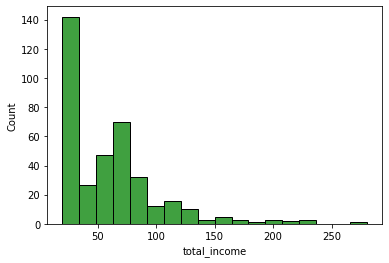

In [121]:
income_nynj = data.loc[(data['is_NY-NJ']== 1) & (data['total_income'] > 0), 'total_income']
sns.histplot(income_nynj, color='green')
plt.show()

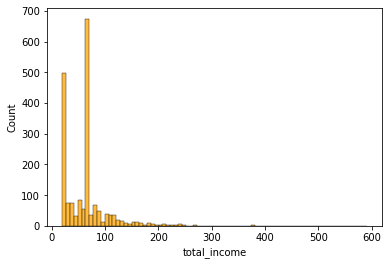

In [122]:
income_others = data.loc[(data['is_NY-NJ']== 0) & (data['total_income'] > 0), 'total_income']
sns.histplot(income_others, color='orange')
plt.show()

Dataset untuk pengujian kedua sudah perhasil dibuat. Langkah selanjutnya sama seperti uji hipotesis sebelumnya, mari lakukan dahulu pengecekan distribusi kenormalan dataset yang ada agar saat pengujian dapat diketahui metode mana yang akan digunakan.

In [112]:
print('Paket Surf')
normality_test(income_nynj)
print('---------------------------------------------------')
print('Paket Ultimate')
normality_test(income_others)

Paket Surf
P-Value: 9.16044367265658e-20
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.
---------------------------------------------------
Paket Ultimate
P-Value: 0.0
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.


Dari hasil yang ditampilkan, kedua dataset memiliki P-Value yang sama dengan pengujian sebelumnya yaitu memiliki nilai yang sangat kecil dan bahkan ada yang memiliki nilai 0. Hasil dari pengecekan distribusi kenormalan nya juga menyatakan bahwa ternyata kedua dataset memiliki distribusi data tidak normal. Maka dari itu pengujian hipotesis harus dilakukan dengan menggunkan metode NonParametric Test.

Mari masuk ke pengujian hipotesis yang kedua. Sebelum itu ada beberapa rumusan yang harus dicatat, diantaranya:
1. Pengujian dilakukan menggunakan Two Independent Samples dengan metode Mann-Whitney U test.
2. Nilai tingkat signifikansi statistik kritis atau alpha di set pada 5%.
3. Uji Hipotesisnya : 
    - H0 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu SAMA.
    - H1 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.

In [125]:
# Uji hipotesis
alpha = 0.05
p_value = mannwhitneyu(income_nynj, income_others, nan_policy='omit').pvalue
print(f'Alpha: {alpha}')
print(f'P_Value: {p_value}')
print(f'Rata-rata Income Area NY-NJ: {income_nynj.mean()}')
print(f'Rata-rata Income Area Others: {income_others.mean()}')
print('-------------------------------------------------------------------------------------')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu SAMA.')
else:
    print('H1 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.')

Alpha: 0.05
P_Value: 0.003927631450027623
Rata-rata Income Area NY-NJ: 59.921352785145885
Rata-rata Income Area Others: 65.2227713987474
-------------------------------------------------------------------------------------
H1 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.


Mari coba visualisasikan kedua dataset agar lebih terlihat perbedaanya.

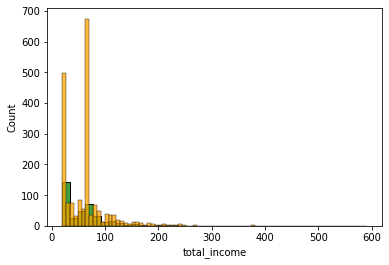

In [114]:
sns.histplot(income_nynj, color='green')
sns.histplot(income_others, color='orange')
plt.show()

findings:

- Uji statistik rata-rata pendapatan antara wilayah NY-NJ dan wilayah lain memiliki nilai P-Value yang sangat kecil yaitu 0.00392.
- Rata-rata pendapatan diwilayah NY-Nj lebih kecil dibandingkan dengan diwilayah lainnya.. Untuk wilayah NY-NJ sendiri  adalah 59.92 dolar sedangkan untuk wilayah lainnya adalah 65.22 dolar.

insights:

- Terlihat dari hasil yang ditampilkan bahwa wilayah NY-NJ dan wilayah lain memiliki rata-rata pendapatan yang tidak terpaut jauh satu sama lain, namun secara uji statistik menyatakan bahwa rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.

## Kesimpulan Umum

Ada beberapa kesimpulan dari proses analisis yang telah dilakukan, yaitu:
1. Permasalahan dari ke 5 tabel yang paling umum adalah tipe data pada kolom date masih berbentuk object, untuk mengatasi masalah ini maka kolom-kolom tersebut dirubah ke kolom datetime.
2. Permasalah lain yaitu pada tabel-tabel yang ada datanya masih mentah, oleh karena itu menambahan beberapa kolom pada tabel-tabel tersebut adalah solusi untuk mempermudah proses analisis.
3. Dari 5 tabel yang ada tidak terdapat missing value namun pada saat kolom-kolom baru ditambahkan, terdapat beberapa kolom yang memiliki nilai NaN. Nilai NaN terjadi karena adanya proses perhitungan pada kolom-kolom tersebut. Oleh karena itu nilai NaN ini diatasi dengan niali 0 karena pada saat proses perhitungan, nilai tersebut adalah 0.
4. Beberapa grafik menunjunkan bahwa dari kedua paket yang ada terjadi peningkatan disetiap bulannya, baik itu secara panggilan, sms, internet dan bahkan secara pendapatan. 
5. Untuk standar deviasi dari segi panggilan dan sms, paket ultimate memiliki nilai yang lebih besar dari paket surf. Namun dari segi internet dan pendapatan, nilai standar deviasi pada paket surf lebih besar dibandingkan dengan paket ultimate.
6. Untuk nilai varians dari segi panggilan dan sms, paket ultimate memiliki nilai yang lebih besar dari paket surf. Namun dari segi internet dan pendapatan, nilai varians pada paket surf lebih besar dibandingkan dengan paket ultimate.
7. Dari hasil pengecekan distribusi kenormalan data, dataset yang menjadi bahan pengujian memiliki P-Value yang sangat kecil dan bahkan ada yang memiliki nilai 0 artinya dataset memiliki distribusi data yang tidak normal. Maka dari itu pengujian hipotesis keduanya harus dilakukan dengan menggunkan NonParametric Test dan menggunakan metode Mann-Whitney U Test.
8. Uji hipotesis telah dilakukan dengan 2 pengujian dan perumusan hipotesis sebagai berikut:
* Rata-rata pendapatan paket Ultimate dan Surf.
  - H0: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf SAMA.
  - H1: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf BERBEDA.
* Rata-rata pendapatan wilayah NY-Nj dan wilayah lain.
  - H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu SAMA.
  - H1: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.
9. Hasil dari uji hipotesis menyatakan bahwa:
    - Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf BERBEDA.
    - Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain itu BERBEDA.